PRUEBA

In [1]:
from pycocotools.coco import COCO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pycocotools.mask as mask_util
from random import randint

coco_folder = '/mnt/DATASSD/DataSandbox/coco'
dp_coco = COCO( coco_folder + '/annotations/densepose_coco_2014_train.json')

loading annotations into memory...
Done (t=8.26s)
creating index...
index created!


In [2]:
# Get img id's for the minival dataset.
im_ids = dp_coco.getImgIds()
# Select a random image id.
Selected_im = im_ids[randint(0, len(im_ids))] # Choose im no 57 to replicate 
# print(Selected_im)
Selected_im = 262145
# Load the image
im = dp_coco.loadImgs(Selected_im)[0]  
# Load Anns for the selected image.
ann_ids = dp_coco.getAnnIds( imgIds=im['id'] )
anns = dp_coco.loadAnns(ann_ids)
# Now read and b
im_name = os.path.join( coco_folder + '/train2014', im['file_name'] )


/mnt/DATASSD/DataSandbox/coco/train2014/COCO_train2014_000000262145.jpg


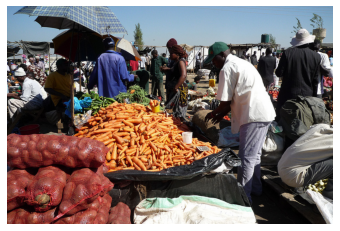

In [3]:
print(im_name)
I=cv2.imread(im_name)
plt.imshow(I[:,:,::-1]); plt.axis('off'); plt.show()

In [4]:
ids = dp_coco.getAnnIds(imgIds=[Selected_im])
print(ids)
target = dp_coco.loadAnns(ids)
print(len(target))
file_name = dp_coco.loadImgs(Selected_im)[0]['file_name']
print(file_name)
mask = dp_coco.annToMask(target[0])
print(mask.shape, mask.max())

[1218400, 1220136, 1246711, 1249960, 1262984, 1266299, 1293147, 1302954, 1311644, 1314438, 1321931, 1731447, 2025332, 900100262145]
14
COCO_train2014_000000262145.jpg
(427, 640) 1


In [38]:
def GetDensePoseMask(Polys):
    MaskGen = np.zeros([256,256])
    for i in range(1,15):
        if(Polys[i-1]):
            current_mask = mask_util.decode(Polys[i-1])
            MaskGen[current_mask>0] = i
    return MaskGen

In [39]:
def GetDensePoseMasks(Polys):
    mask_list = [0]*15
    rle_mask_list = [0]*15
    for i in range(1,15):
        MaskGen = np.zeros([256,256])
        if(Polys[i-1]):
            current_mask = mask_util.decode(Polys[i-1])
            rle_mask = mask_util.encode(current_mask)
            MaskGen[current_mask>0] = 1
        mask_list[i-1] = MaskGen.astype(np.uint8)
        rle_mask_list[i-1] = rle_mask
    return mask_list, rle_mask_list

In [ ]:
def get_poligons(mask, dest_size):
    c = cv2.findContours(current_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = [0]*2*len(c[0][0].tolist())
    for i,x in enumerate(c[0][0].tolist()):
        contours[2*i]=int(x[0][0])
        contours[2*i+1]= int(x[0][1])

for i in range(0,len(contours),2):
    xx = contours[i]
    yy = contours[i+1]
    I = cv2.circle(I, (xx,yy),2,(0,0,255),2)

In [7]:
points0 = anns[0]['segmentation'][0]
pointsU = anns[0]['dp_U']
pointsV = anns[0]['dp_V']
pointsx = anns[0]['dp_x']
pointsy = anns[0]['dp_y']


In [8]:
I2 = I.copy()
for i in range(0,len(pointsU)-1,2):
    x = int(pointsU[i])
    y = int(pointsU[i+1])
    I2 = cv2.circle(I2, (x,y), 2,(0,255,0),2)

I3 = I.copy()
for i in range(0,len(pointsU)-1,2):
    x = int(pointsV[i])
    y = int(pointsV[i+1])
    I3 = cv2.circle(I3, (x,y), 2,(0,255,0),2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
387 71 532 393
145 322
526 44 616 232
90 188
(427, 640, 3)


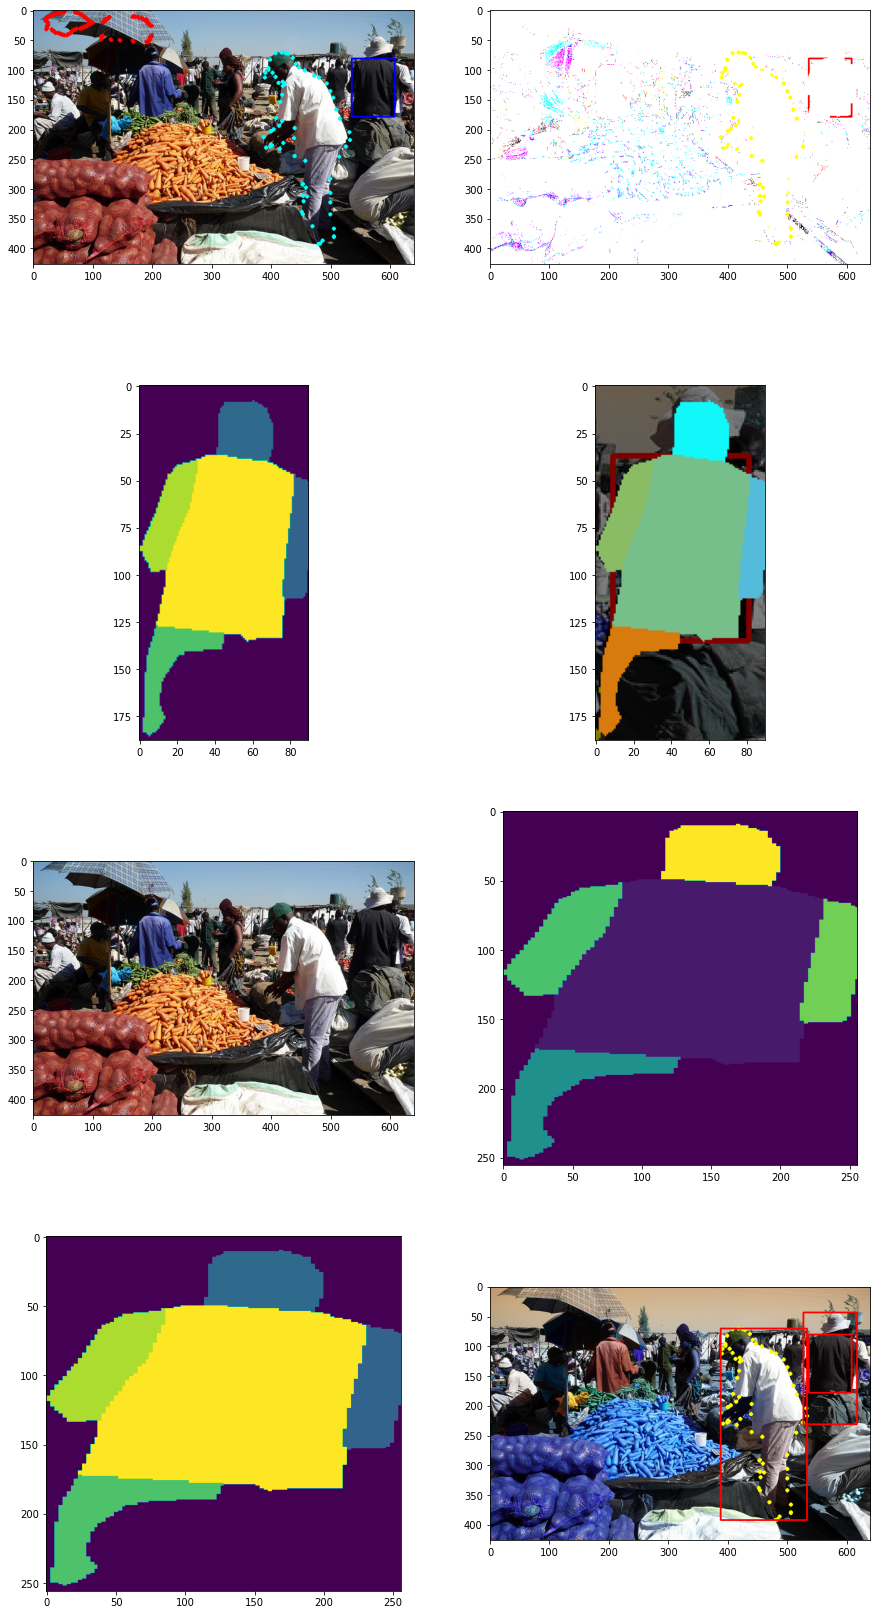

In [40]:

for i in range(0,len(points0),2):
    x = int(points0[i])
    y = int(points0[i+1])
    I = cv2.circle(I, (x,y), 2,(255,255,0),2)
    
I_vis=I.copy()/2 # Dim the image.
I_vis2=I.copy()

for ann in anns:  
    bbr =  np.array(ann['bbox']).astype(int) # the box.
    if( 'dp_masks' in ann.keys()): # If we have densepose annotation for this ann, 
        Mask = GetDensePoseMask(ann['dp_masks'])
        mascaras = ann['dp_masks']
        ################
        x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
        print(x1,y1,x2,y2)
        I_vis2 = cv2.rectangle(I_vis2, (x1,y1), (x2,y2),(255,0,0),2)
        x2 = min( [ x2,I.shape[1] ] );  y2 = min( [ y2,I.shape[0] ] )
        ################ 
        print(int(x2-x1),int(y2-y1))
        MaskIm = cv2.resize( Mask, (int(x2-x1),int(y2-y1)) ,interpolation=cv2.INTER_NEAREST)

        MaskBool = np.tile((MaskIm==0)[:,:,np.newaxis],[1,1,3])
        #  Replace the visualized mask image with I_vis.
        Mask_vis = cv2.applyColorMap( (MaskIm*15).astype(np.uint8) , cv2.COLORMAP_PARULA)[:,:,:]
        Mask_vis[MaskBool]=I_vis[y1:y2,x1:x2,:][MaskBool]
        I_vis[y1:y2,x1:x2,:] = I_vis[y1:y2,x1:x2,:]*0.3 + Mask_vis*0.7



'''for i in range(0,len(points1),2):
    x = int(points1[i])
    y = int(points1[i+1])
    I = cv2.circle(I, (x,y), 2,(255,0,255),2)'''

print(I_vis.shape)
fig = plt.figure(figsize=[15,30])
plt.subplot(4,2,1)
plt.imshow(I[:,:,::-1])

plt.subplot(4,2,2)
plt.imshow(I_vis)

plt.subplot(4,2,3)
plt.imshow(MaskIm)

plt.subplot(4,2,4)
plt.imshow(Mask_vis)

plt.subplot(4,2,5)
plt.imshow(I2[:,:,::-1])

plt.subplot(4,2,6)
plt.imshow(mask)

plt.subplot(4,2,7)
plt.imshow(Mask)

plt.subplot(4,2,8)
plt.imshow(I_vis2)

plt.show()

In [37]:
print(type(c[0][0][0][0]), c[0][0].tolist())
a = [0]*2*len(c[0][0].tolist())
for i,x in enumerate(c[0][0].tolist()):
    a[2*i]=int(x[0][0])
    a[2*i+1]= int(x[0][1])
print(a)

<class 'numpy.ndarray'> [[[168, 10]], [[167, 11]], [[128, 11]], [[128, 12]], [[127, 13]], [[126, 13]], [[125, 14]], [[123, 14]], [[122, 15]], [[120, 15]], [[120, 19]], [[119, 20]], [[117, 20]], [[117, 43]], [[116, 44]], [[114, 44]], [[114, 49]], [[130, 49]], [[131, 50]], [[145, 50]], [[146, 51]], [[167, 51]], [[168, 52]], [[168, 53]], [[190, 53]], [[191, 54]], [[193, 54]], [[193, 51]], [[194, 50]], [[196, 50]], [[196, 45]], [[197, 44]], [[199, 44]], [[199, 26]], [[197, 26]], [[196, 25]], [[196, 24]], [[194, 24]], [[193, 23]], [[193, 20]], [[191, 20]], [[190, 19]], [[190, 15]], [[185, 15]], [[184, 14]], [[183, 14]], [[182, 13]], [[177, 13]], [[176, 12]], [[176, 11]], [[171, 11]], [[170, 10]]]
[168, 10, 167, 11, 128, 11, 128, 12, 127, 13, 126, 13, 125, 14, 123, 14, 122, 15, 120, 15, 120, 19, 119, 20, 117, 20, 117, 43, 116, 44, 114, 44, 114, 49, 130, 49, 131, 50, 145, 50, 146, 51, 167, 51, 168, 52, 168, 53, 190, 53, 191, 54, 193, 54, 193, 51, 194, 50, 196, 50, 196, 45, 197, 44, 199, 44, 1

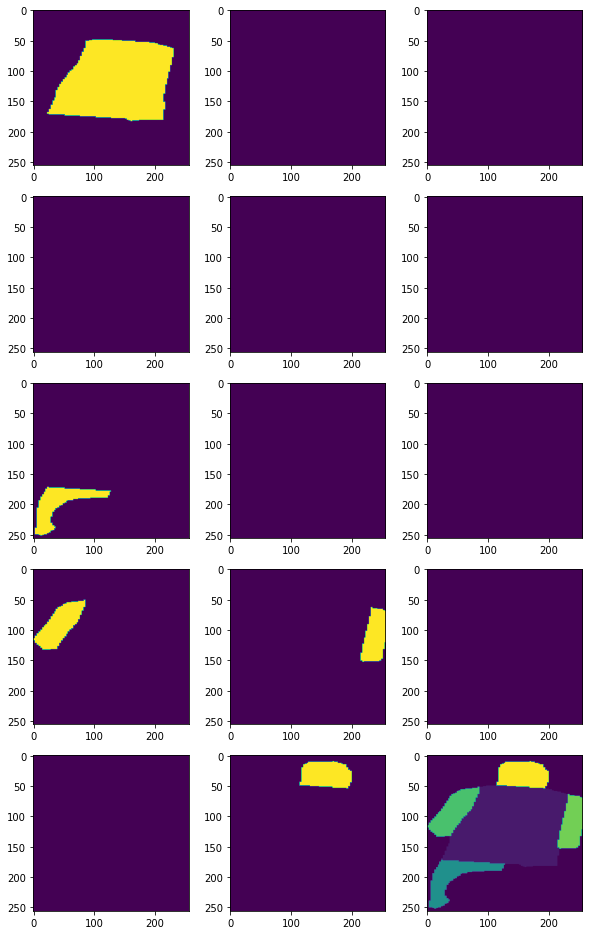

In [10]:
mask_list, rle_mask_list = GetDensePoseMasks(mascaras)
mask_list[14]=Mask
fig = plt.figure(figsize=[10,20])
for i in range(5):
    plt.subplot(6,3,1+i*3)
    plt.imshow(mask_list[i*3])
    plt.subplot(6,3,2+i*3)
    plt.imshow(mask_list[1+i*3])
    plt.subplot(6,3,3+i*3)
    plt.imshow(mask_list[2+i*3])

# plt.subplot(6,3,15)
# plt.imshow(Mask_vis)

plt.show()
    

In [11]:
mask_list_final = [0]*15
print("Image shape and final mask shape", I.shape)
x1,y1,x2,y2 = 526, 44, 616, 232 # 387, 71, 532, 393 # bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
x2 = min( [ x2, I.shape[1]] )
y2 = min( [ y2, I.shape[0]] )
print("bounding box", x1,y1,x2,y2)

for i, mask in enumerate(mask_list):
    final_mask = np.zeros([I.shape[0],I.shape[1]])
    print(final_mask.shape)
    resized_mask = cv2.resize( mask, (int(x2-x1),int(y2-y1)) ,interpolation=cv2.INTER_NEAREST)
    print(int(y2-y1),int(x2-x1))
    print("bounding box", x1,y1,x2,y2)
    print("resized mask shape", resized_mask.shape)
    print("final mask shape", final_mask[y1:y2,x1:x2].shape)
    final_mask[y1:y2,x1:x2] = resized_mask
    mask_list_final[i]=final_mask

Image shape and final mask shape (427, 640, 3)
bounding box 526 44 616 232
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 640)
188 90
bounding box 526 44 616 232
resized mask shape (188, 90)
final mask shape (188, 90)
(427, 6

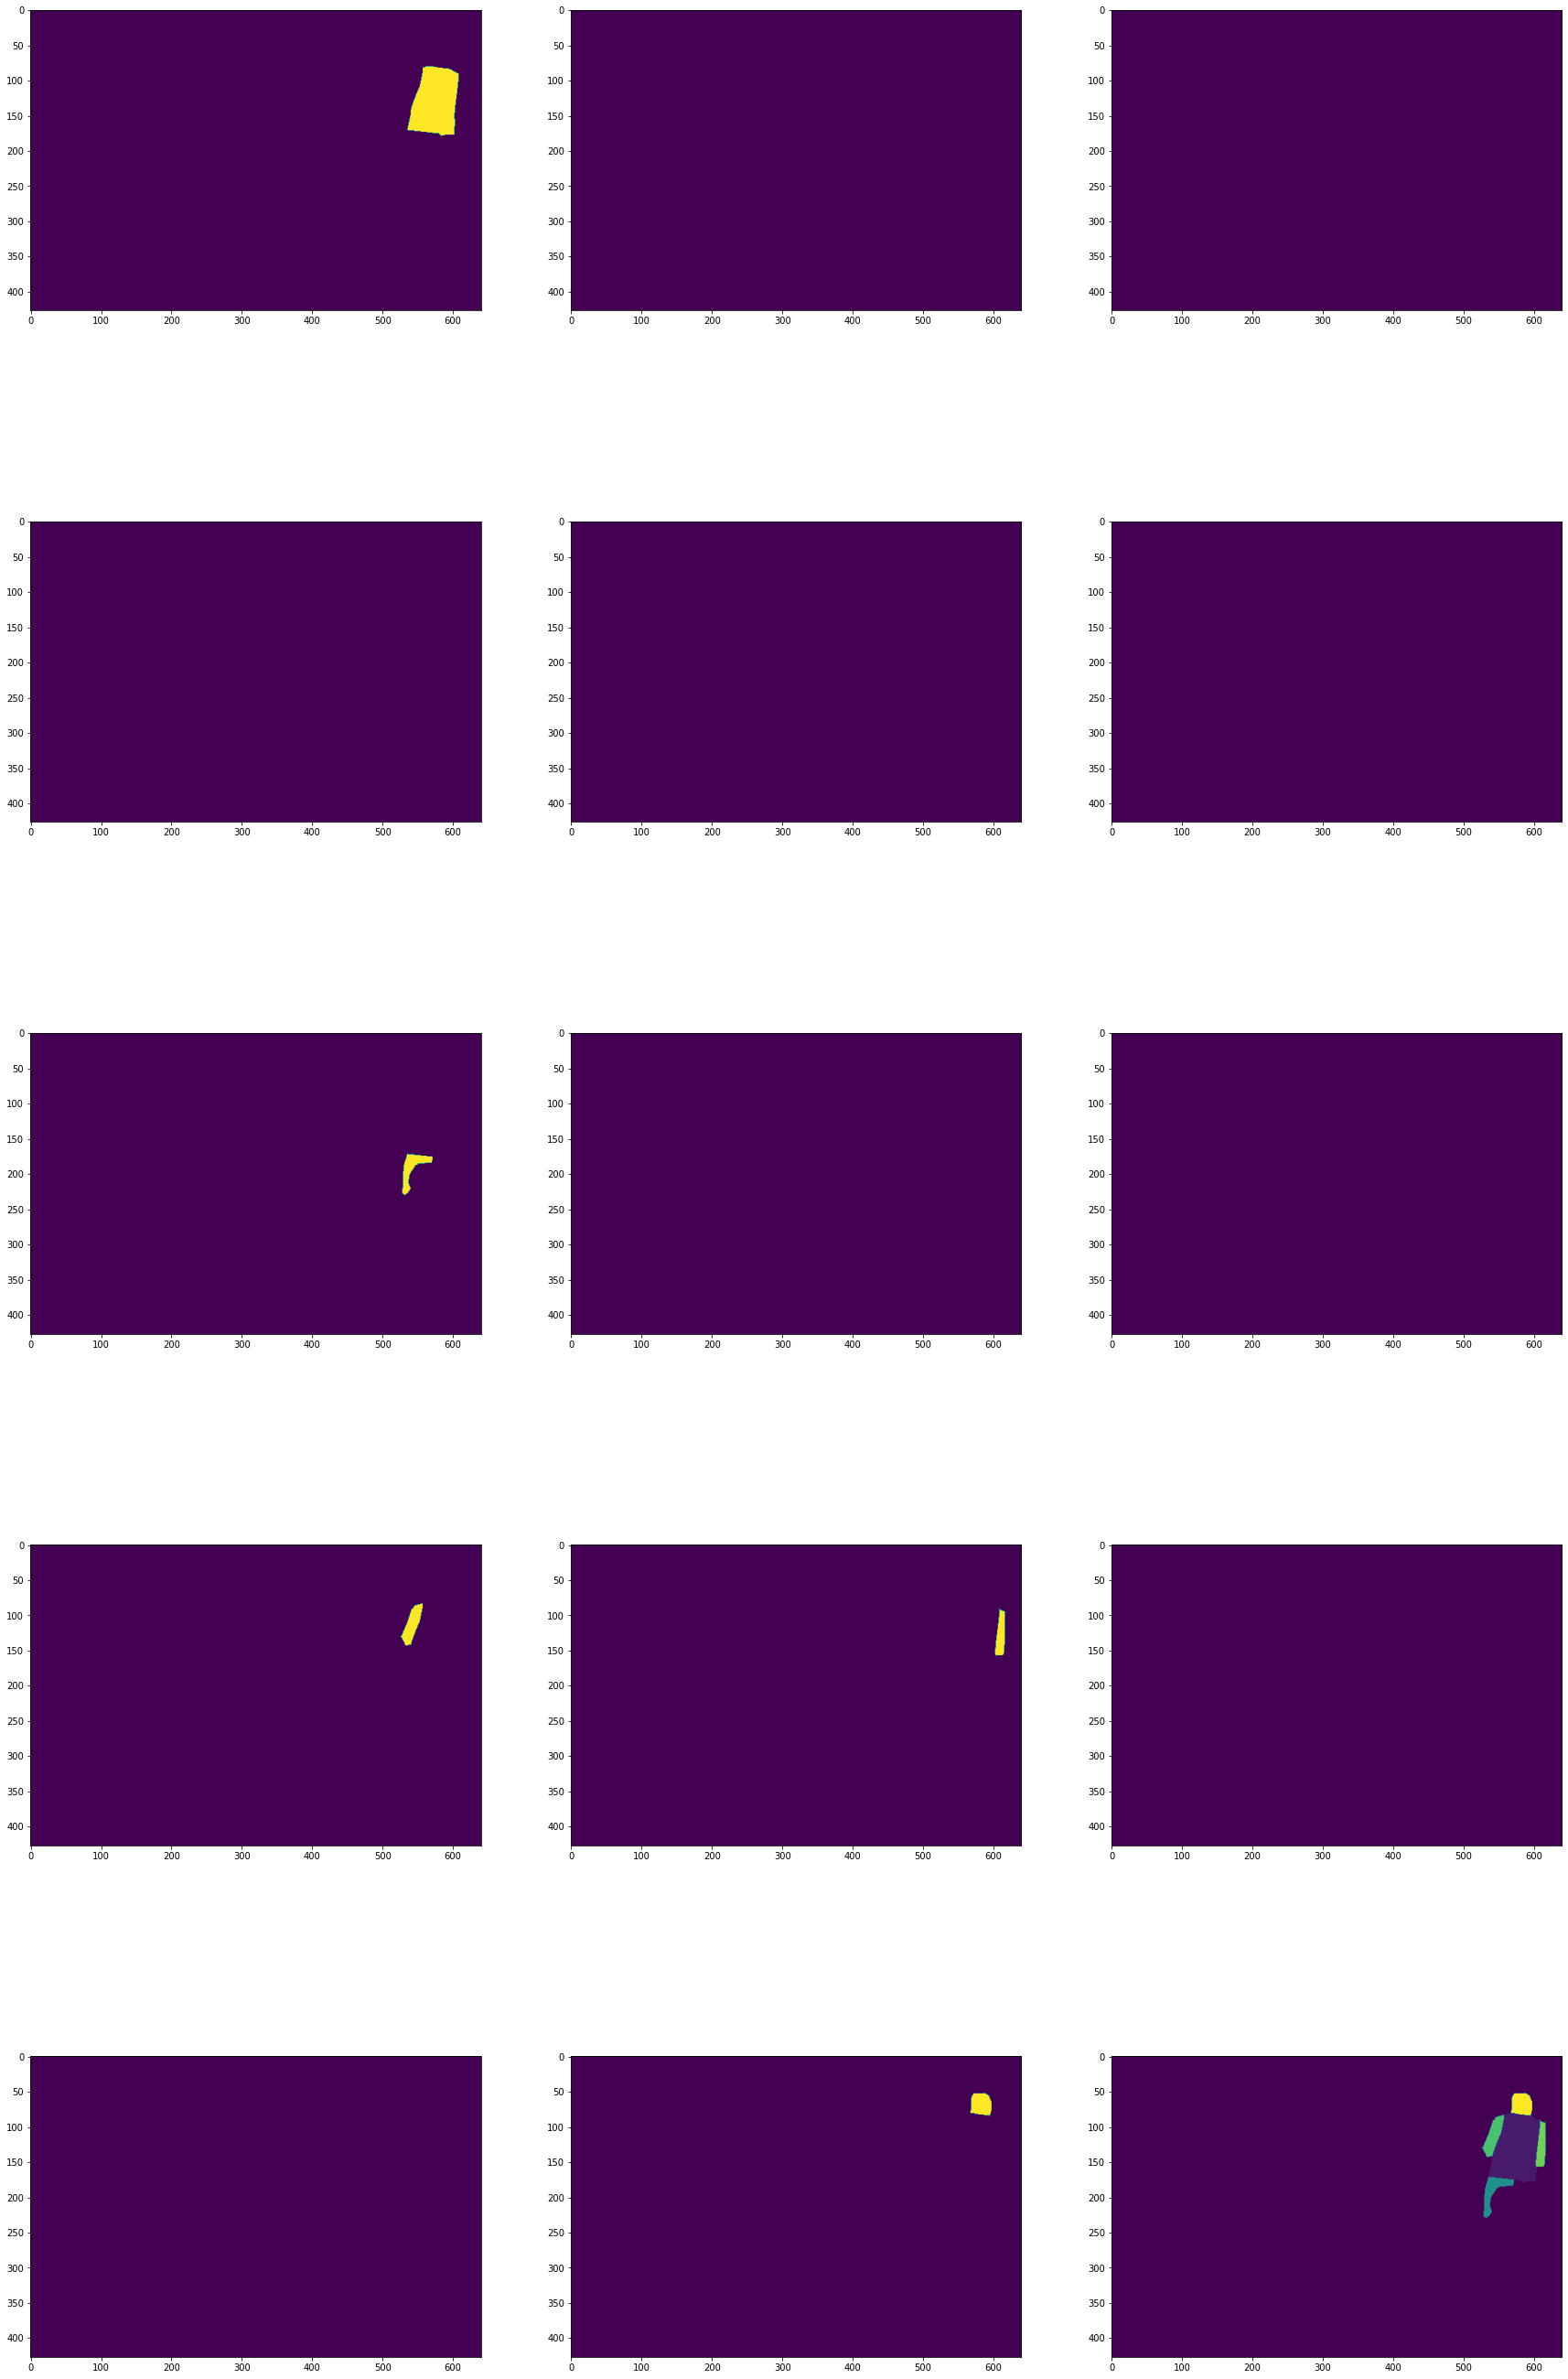

In [12]:
fig = plt.figure(figsize=[30,60])
for i in range(5):
    plt.subplot(6,3,1+i*3)
    plt.imshow(mask_list_final[i*3])
    plt.subplot(6,3,2+i*3)
    plt.imshow(mask_list_final[1+i*3])
    plt.subplot(6,3,3+i*3)
    plt.imshow(mask_list_final[2+i*3])


plt.show()

(array([ 81,  81,  81, ..., 178, 178, 179]), array([561, 562, 563, ..., 586, 587, 583]))
81 179 535 607
81 535 179 607


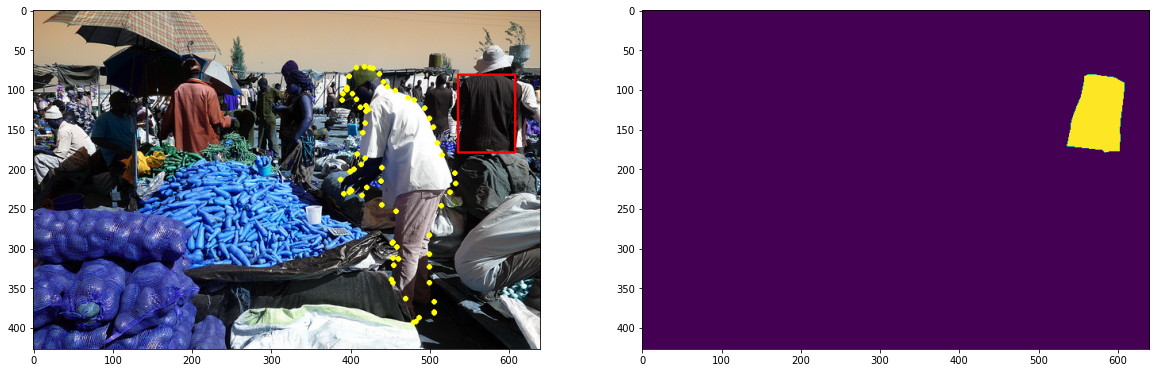

In [13]:
az = np.nonzero(mask_list_final[0])
print(az)
print(np.min(az[0]), np.max(az[0]), np.min(az[1]), np.max(az[1]))
# arr = mask_list_final[0]!=0
# print(arr.any(axis=1))
#print(np.where(arr.any(axis=0)))
#x1, y1, x2, y2 = mask_util.toBbox(mask_list_final[0])
x1,x2,y1, y2=np.min(az[0]), np.max(az[0]), np.min(az[1]), np.max(az[1])
print(x1, y1, x2, y2)
last = cv2.rectangle(I, (y1,x1), (y2,x2), (255,0,0), 2)

fig = plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(I)
plt.subplot(2,2,2)
plt.imshow(mask_list_final[0])
plt.show()

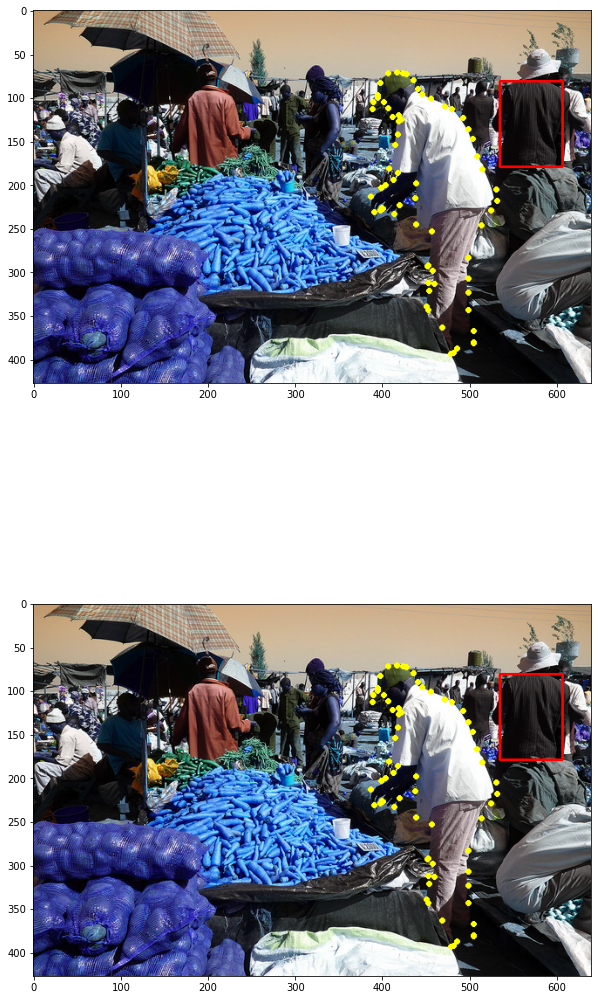

In [14]:
fig = plt.figure(figsize=[10,20])
plt.subplot(2,1,1)
plt.imshow(I)
plt.subplot(2,1,2)
plt.imshow(last)
plt.show()

In [15]:
mask_util.area(rle_mask_list[0])

20969

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


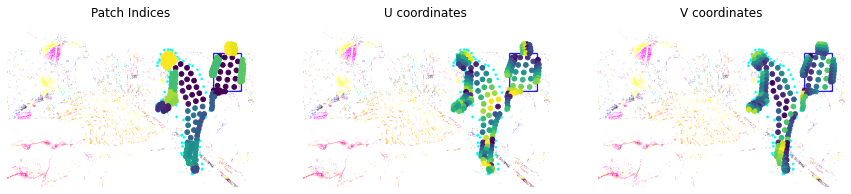

In [16]:
# Show images for each subplot.
fig = plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.imshow(I[:,:,::-1]/2);plt.axis('off');plt.title('Patch Indices')
plt.subplot(1,3,2)
plt.imshow(I[:,:,::-1]/2);plt.axis('off');plt.title('U coordinates')
plt.subplot(1,3,3)
plt.imshow(I[:,:,::-1]/2);plt.axis('off');plt.title('V coordinates')

## For each ann, scatter plot the collected points.
for ann in anns:
    bbr =  np.round(ann['bbox']) 
    if( 'dp_masks' in ann.keys()):
        Point_x = np.array(ann['dp_x'])/ 255. * bbr[2] # Strech the points to current box.
        Point_y = np.array(ann['dp_y'])/ 255. * bbr[3] # Strech the points to current box.
        #
        Point_I = np.array(ann['dp_I'])
        Point_U = np.array(ann['dp_U'])
        Point_V = np.array(ann['dp_V'])
        #
        x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
        x2 = min( [ x2,I.shape[1] ] ); y2 = min( [ y2,I.shape[0] ] )
        ###############
        Point_x = Point_x + x1 ; Point_y = Point_y + y1
        plt.subplot(1,3,1)
        plt.scatter(Point_x,Point_y,22,Point_I)
        plt.subplot(1,3,2)
        plt.scatter(Point_x,Point_y,22,Point_U)
        plt.subplot(1,3,3)
        plt.scatter(Point_x,Point_y,22,Point_V)
        
plt.show()